# Neighborhood tabulation areas

Data source: https://www1.nyc.gov/site/planning/data-maps/open-data/dwn-nynta.page

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
from os.path import join
import os

In [9]:
%%bash
cd ..
cd data
mkdir neighborhood_tabulation_areas
cd neighborhood_tabulation_areas
wget https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nynta_18a.zip
unzip nynta_18a.zip

Archive:  nynta_18a.zip
  inflating: nynta_18a/nynta.shp     
  inflating: nynta_18a/nynta.dbf     
  inflating: nynta_18a/nynta.shx     
  inflating: nynta_18a/nynta.prj     
  inflating: nynta_18a/nynta.shp.xml  


mkdir: neighborhood_tabulation_areas: File exists
--2018-04-12 13:44:05--  https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nynta_18a.zip
Resolving www1.nyc.gov... 2600:1408:9000:19a::1500, 2600:1408:9000:1ae::1500, 23.217.171.105
Connecting to www1.nyc.gov|2600:1408:9000:19a::1500|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 934399 (912K) [application/zip]
Saving to: ‘nynta_18a.zip’

     0K .......... .......... .......... .......... ..........  5% 4.12M 0s
    50K .......... .......... .......... .......... .......... 10% 2.99M 0s
   100K .......... .......... .......... .......... .......... 16% 6.56M 0s
   150K .......... .......... .......... .......... .......... 21% 11.0M 0s
   200K .......... .......... .......... .......... .......... 27% 12.5M 0s
   250K .......... .......... .......... .......... .......... 32% 9.05M 0s
   300K .......... .......... .......... .......... .......... 38% 9.79M 0s
   350K .......... .......... 

In [10]:
infile = join("..", "data", "neighborhood_tabulation_areas", "nynta_18a")

In [11]:
neighborhoods = gpd.read_file(infile)

In [12]:
neighborhoods.head()

,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area,geometry
0,3,Brooklyn,047,BK88,Borough Park,39247.228028,5.400502e+07,"POLYGON ((990897.9000244141 169268.1207885742,..."
1,4,Queens,081,QN52,East Flushing,25843.364936,2.945438e+07,"POLYGON ((1041061.948242188 215429.4609985352,..."
2,4,Queens,081,QN48,Auburndale,32446.878673,3.416422e+07,"POLYGON ((1046392.971191406 210169.7536010742,..."
3,4,Queens,081,QN51,Murray Hill,33266.904811,5.248828e+07,"POLYGON ((1038593.459228516 221913.3550415039,..."
4,4,Queens,081,QN27,East Elmhurst,19816.712323,1.972685e+07,"POLYGON ((1022728.275024414 217530.8082275391,..."


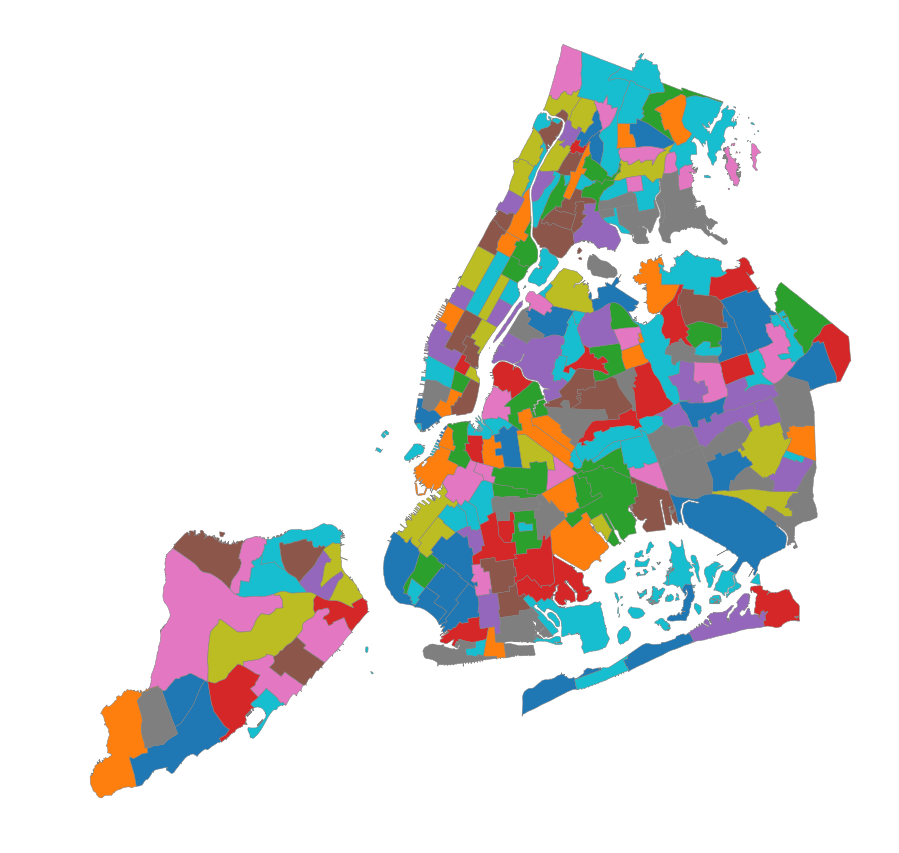

NYC Neighborhood Tabulation Areas


In [13]:
f, ax = plt.subplots(1, figsize=(15,15))
neighborhoods.plot(ax=ax, linewidth=0.5, edgecolor='0.5', column='NTAName')
ax.set_axis_off()
plt.axis('equal')
plt.show()
print("NYC Neighborhood Tabulation Areas")

Inspect coordinate reference system:

In [14]:
neighborhoods.crs

{'datum': 'NAD83',
 'lat_0': 40.16666666666666,
 'lat_1': 40.66666666666666,
 'lat_2': 41.03333333333333,
 'lon_0': -74,
 'no_defs': True,
 'proj': 'lcc',
 'units': 'us-ft',
 'x_0': 300000,
 'y_0': 0}

Change CRS to equirectangular to match Citibike stations campaign.

In [15]:
neighborhoods = neighborhoods.to_crs({'init': 'epsg:4326'})

In [16]:
neighborhoods.head()

,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area,geometry
0,3,Brooklyn,047,BK88,Borough Park,39247.228028,5.400502e+07,POLYGON ((-73.97604935657381 40.63127590564677...
1,4,Queens,081,QN52,East Flushing,25843.364936,2.945438e+07,POLYGON ((-73.79493246233996 40.75779803007455...
2,4,Queens,081,QN48,Auburndale,32446.878673,3.416422e+07,POLYGON ((-73.77573836927098 40.74332564716399...
3,4,Queens,081,QN51,Murray Hill,33266.904811,5.248828e+07,POLYGON ((-73.80379022888246 40.77561011179249...
4,4,Queens,081,QN27,East Elmhurst,19816.712323,1.972685e+07,"POLYGON ((-73.86109724335759 40.7636644770869,..."


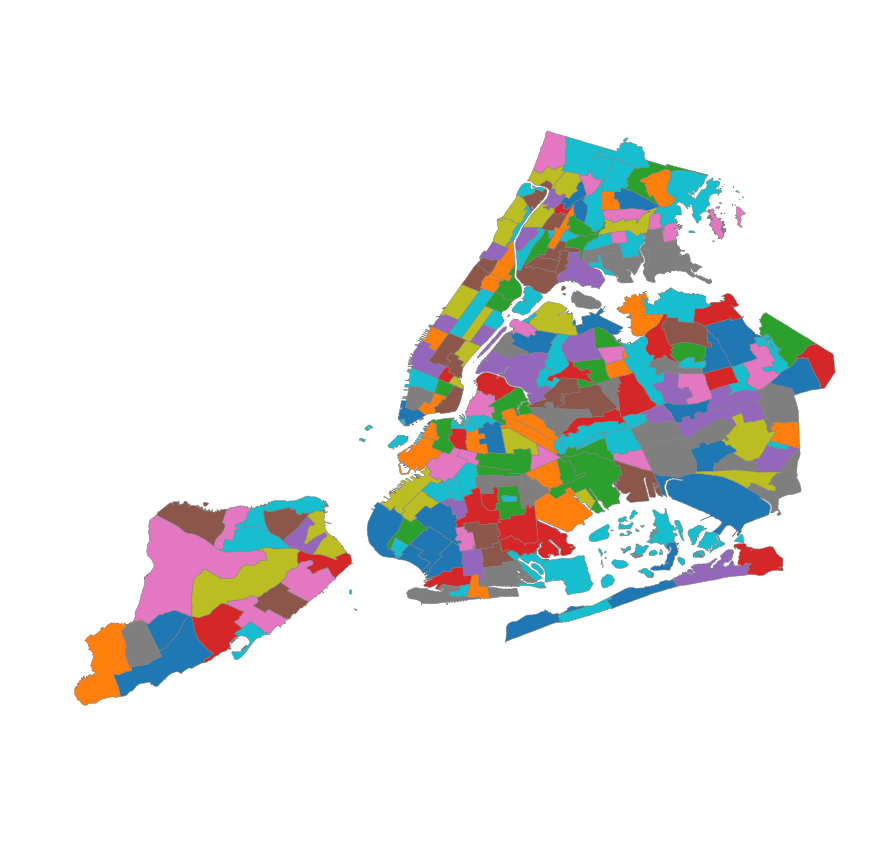

NYC Neighborhood Tabulation Areas (Equirectangular Projection)


In [17]:
f, ax = plt.subplots(1, figsize=(15,15))
neighborhoods.plot(ax=ax, linewidth=0.5, edgecolor='0.5', column='NTAName')
ax.set_axis_off()
plt.axis('equal')
plt.show()
print("NYC Neighborhood Tabulation Areas (Equirectangular Projection)")

In [18]:
root = ".."

output_dir = join(root, "data", "neighborhood_tabulation_areas", "nyc_neighborhoods_4326")

# Make data directory
if not os.path.exists(output_dir):
    os.mkdir(output_dir)
neighborhoods.to_file(join(output_dir))